## Tutorial for performing Wigner state tomography for a single-qubit 

Requirement: Install DROPStomo package using 'pip install DROPStomo'


Importing required packages and modules

In [5]:
# This requires a installation of DROPStomo package. Use 'pip install DROPStomo' for installation.
# import all the requried packages
from DROPStomo import WQST1Q
from DROPStomo import WQST2Q
from DROPStomo import WQPT1Q

from turtle import circle
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint
import time
from fractions import Fraction
from math import gcd
from numpy import pi
from qiskit import IBMQ

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, visualize_transition, plot_bloch_vector
from qiskit.circuit.library import *
from qiskit import (QuantumRegister, ClassicalRegister, QuantumCircuit,
    execute, Aer, compiler)
from qiskit.tools.monitor import job_monitor
from qiskit.tools import job_monitor, backend_monitor, backend_overview
from qiskit.quantum_info import Statevector
from qiskit.visualization import exceptions
from qiskit.visualization import latex as _latex
from qiskit.visualization import text as _text
from qiskit.visualization import utils
from qiskit.visualization import matplotlib as _matplotlib
import matplotlib as mpl

from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
print('import complete')

import complete


Provide a simulator or a quantum device. For performing single-qubit process tomography, two-qubits are required.

For simulators and device check out: 'https://quantum-computing.ibm.com/services/resources?tab=systems' 


In [6]:
simulator = Aer.get_backend('qasm_simulator')

Next, define a gate or set of gate to prepare a quantum state to tomograph and number of angles to perform scanning.

In [7]:
# Input: gate for state preparation. Here for example, U3 gate is used. 
Up = U3Gate(theta=pi/2, phi=0, lam=0) 
# you can also chose a standard quantum gate, such as:
# Up = HGate()

# resolution for scanning (which corresponds to number of sample points for tomography)
# Input: just provide res_theta: resolution of theta. 
# resolution for phi (res_phi) = 2*res_theta-1
res_theta = 12

Now, this function creates quantum circuits for performing tomography

In [8]:
# --Input--
# res_theta: resolution of polar angles for sampling between [0,pi] for tomography
# Up: gate for state preparation
circ_q = WQST1Q.WQST_1Q_circuits(res_theta,Up)

┌─────────────┐┌───────────┐ ░ ┌─┐
     q: ┤ U3(π/2,0,0) ├┤ U3(0,0,0) ├─░─┤M├
        └─────────────┘└───────────┘ ░ └╥┘
meas: 1/════════════════════════════════╩═
                                        0

Total number of ciruits for WQST for single qubit are:276


Lastly, run the quantum circuits on a quantum device/simulator. 
#### Input
- res_theta: resolution of polar angles for sampling between [0,pi] for tomography
- circuits: circuits for performing Wigner state tomography for single-qubit
- device: provide a simulator or a quantum device
- shots: number of shots
- inter: interactivity of tomographed droplets. 
    - inter=0: provides a matplotlib plot with fixed point of view (boring). 
    - inter=1: provides a plotly plot with three-dimensional interactive droplets. [_preferred!_]
- rhoT: target density matrix (used for calculating the fidelity).


#### Returns
- Tomographed density matrix
- Tomographed state fidelity
- Plot of expectation values
- Droplet plots: 
    - identity droplet (corresponds to identity part of the density matrix) 
    - qubit1: droplet representing the density matrix (apart from identity part)

#### Droplet insights
- The direction of the droplet reflects the direction of the Bloch vector and color represents the phase given by arg[dropelt function].
- color description: red-> positive, green-> negative, yellow-> positive imaginary, blue-> negative imaginary.    


Job 0 of 1
Job Status: job has successfully run


None

1
State fidelity is: (0.99999989869511+0j)
Experimental state is: [[0.49997468+0.j         0.49977572-0.00027471j]
 [0.49977572+0.00027471j 0.50002532+0.j        ]]


<Figure size 360x360 with 0 Axes>

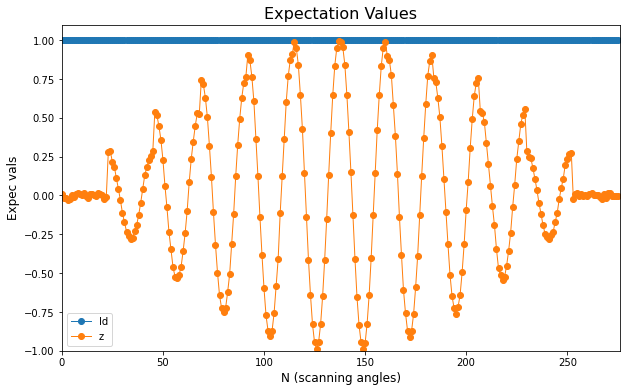

(None, None)

In [9]:
# Target density matrix (important for calculating fidelity)
rho = np.matrix([[0.5,0.5],[0.5,0.5]])

# running quantum circuits 
WQST1Q.WQST_1Q_runner(res_theta,circuits=circ_q,device=simulator,shots=8192,inter=1,rhoT=rho)